# HW6 | Integral

Daniil Sherki

-------

Write MPI based (mpi4py) python script that numerically calculates the integral of an arbitrary function **f(x) (x ∊ R1)**. Make discretization of x sufficiently large to be able elicit speed up from the parallel computation.

Steps:

1. Set the number of processes and the amount of discretization points

2. Distribute distinct regions of x to each process and find local integrals

3. Call the Reduce routine from MPI to sum up the local integrals and get the final result

4. Check the result with the analytical formula

CRITERIA:

1. Implement the non-parallel version of the integral calculation function (1 point)

2. Implement parallel MPI version using mpi4py (2 points)

3. Achieve speed up > 1.5 with 2 process parallel version vs. 1 process sequential version  (2 points)

4. Plot speedup vs. number of processes (2 points)

5. Check the correctness of the calculation results (2 points)



$$f(x) = \left(e^{x} - \cos x \right)^2 $$

$$F(x) = \int \left(e^{x} - \cos x \right)^2 dx = \frac{e^{2 x} + x - 2 e^x \sin x + \cos x (-2 e^x + \sin x) }{2} + C$$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

def func(x):
    return np.power(np.exp(x) - np.cos(x),2)

def analytical_integral(x):
    return 0.5*(np.exp(2*x) + x - 2 * np.exp(x) * np.sin(x) + np.cos(x) * (-2 * np.exp(x) + np.sin(x)))


bnds = [0,3]

x = np.linspace(bnds[0],bnds[1],2*10**8)

analytical_solution = analytical_integral(bnds[1]) - analytical_integral(bnds[0])
start = time()
trapz_solution = np.trapz(func(x), x)
end = time() - start
trapz_err = np.abs(analytical_solution - trapz_solution)

print(f'Analytical solution of integral from {bnds[0]} to {bnds[1]} is {analytical_solution:.4f}')
print(f'Trapezoidal solution of integran from {bnds[0]} to {bnds[1]} is {trapz_solution:.4f}')
print(f'Numerical calculation error is {trapz_err}')
print(f'Time to calculation is {end :.6f} seconds')

Analytical solution of integral from 0 to 3 is 220.6946
Trapezoidal solution of integran from 0 to 3 is 220.6946
Numerical calculation error is 2.842170943040401e-14
Time to calculation is 8.790596 seconds


In [29]:
%%writefile integral.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

def func(x):
    return np.power(np.exp(x) - np.cos(x),2)
    
points_num = 2*10**8

# now I defined the step 
step = points_num//size

# let's create linspace of x
space = np.linspace(0,3, points_num)

if rank != size:
    subspace = space[rank*step:(rank+1)*step]
else:
    subspace = space[rank*step:]

result = np.trapz(func(subspace), subspace)
result = np.array(result, dtype=np.float32)
global_result = None

if rank == 0:
    global_result = np.empty(1, dtype=np.float32)

comm.Reduce(result, global_result, op=MPI.SUM, root=0)

if rank==0:
    np.save('global_result.npy', global_result)
    print(global_result)

MPI.Finalize()

Overwriting integral.py


In [30]:
times = []
sols = []
errs = []

In [31]:
start = time()
!mpirun -n 1 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(float(sol))
errs.append(np.abs(analytical_solution - sol))

python(74537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [32]:
start = time()
!mpirun -n 2 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [33]:
start = time()
!mpirun -n 3 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [34]:
start = time()
!mpirun -n 4 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [35]:
start = time()
!mpirun -n 5 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [36]:
start = time()
!mpirun -n 6 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.6946]


In [37]:
start = time()
!mpirun -n 7 --allow-run-as-root --oversubscribe python integral.py
end = time() - start
times.append(end)
sol = np.load('global_result.npy')
sols.append(sol)
errs.append(np.abs(analytical_solution - sol))

python(74640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[220.69458]


In [38]:
times, errs, sols

([9.32185411453247,
  7.584476947784424,
  8.079296112060547,
  11.611309051513672,
  31.753094911575317,
  62.65440273284912,
  99.11783409118652],
 [array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([1.5258789e-05], dtype=float32)],
 [220.69459533691406,
  array([220.6946], dtype=float32),
  array([220.6946], dtype=float32),
  array([220.6946], dtype=float32),
  array([220.6946], dtype=float32),
  array([220.6946], dtype=float32),
  array([220.69458], dtype=float32)])

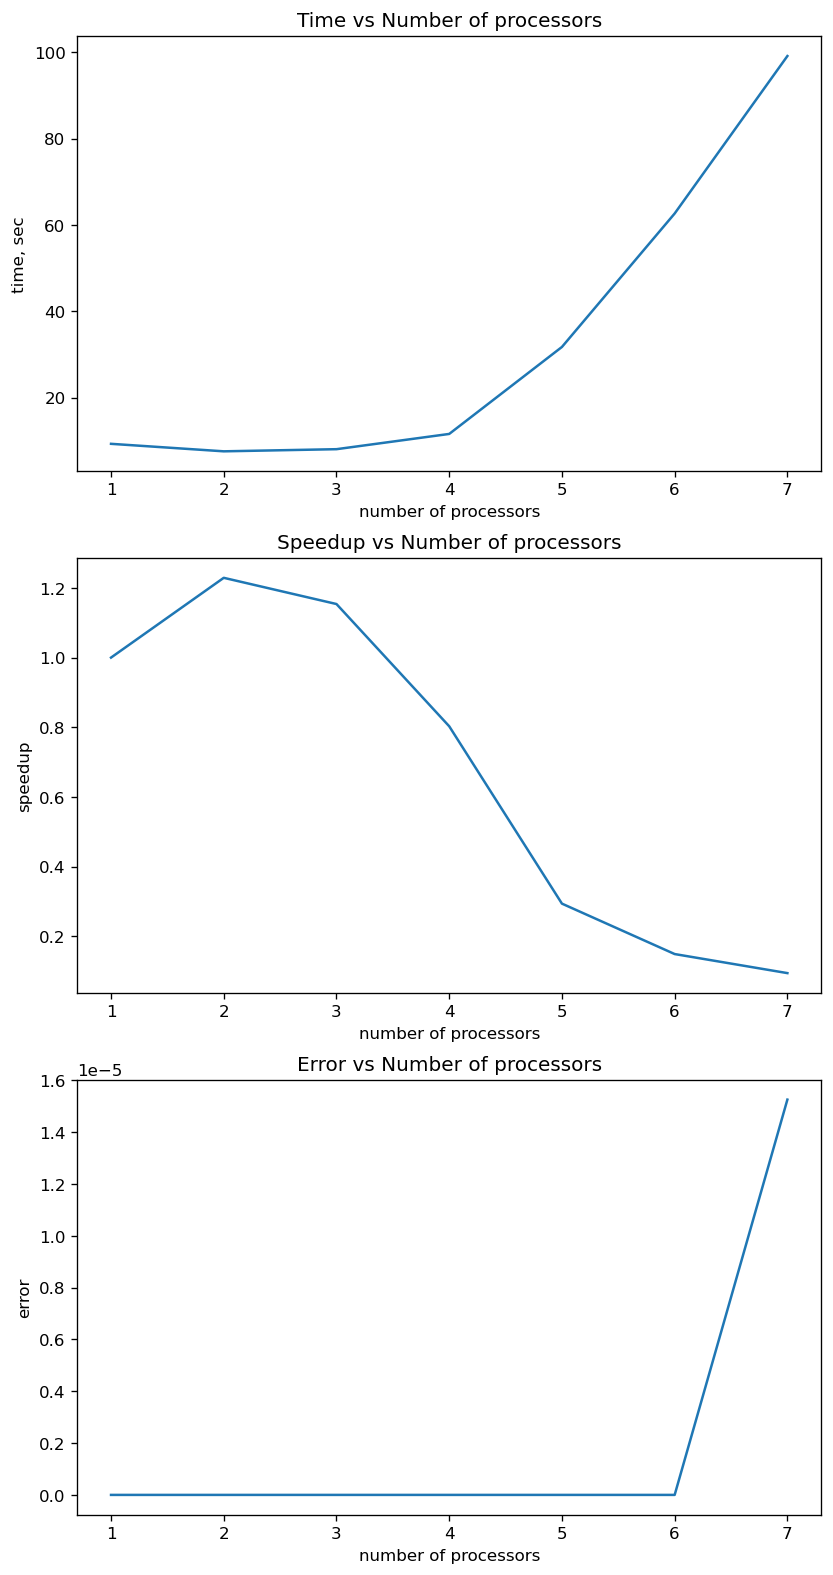

In [39]:
num_procs = range(1, 8)
plt.figure(figsize=(8,16), dpi=120)
plt.subplot(311)
plt.plot(num_procs, times)
plt.title('Time vs Number of processors')
plt.xlabel('number of processors')
plt.ylabel('time, sec')
plt.subplot(312)
plt.plot(num_procs, [times[0]/x for x in times])
plt.title('Speedup vs Number of processors')
plt.xlabel('number of processors')
plt.ylabel('speedup')
plt.subplot(313)
plt.plot(num_procs, errs)
plt.title('Error vs Number of processors')
plt.xlabel('number of processors')
plt.ylabel('error')
plt.show()